In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.metrics import Precision, Recall
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [39]:
df=pd.read_csv('stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.500000,1.0,0.801265,0.301260,0.333333,1
1,0.0,0.743652,0.0,0.0,1.0,0.750000,0.0,0.679023,0.212981,0.666667,1
2,0.5,0.975586,0.0,1.0,1.0,0.500000,0.0,0.234512,0.254296,0.666667,1
3,0.0,0.597168,0.0,0.0,1.0,0.500000,1.0,0.536008,0.276060,1.000000,1
4,0.0,0.963379,1.0,0.0,1.0,0.750000,0.0,0.549349,0.156930,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,0.0,0.899548,1.0,0.0,1.0,0.532123,0.0,0.613801,0.281716,0.666667,1
9718,0.0,0.866094,0.0,0.0,1.0,0.000000,1.0,0.942631,0.321731,0.666667,1
9719,0.5,0.871179,0.0,0.0,1.0,0.500000,0.0,0.859567,0.332491,0.762415,1
9720,0.0,0.916245,0.0,0.0,1.0,0.750000,0.0,0.105444,0.217425,0.333333,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   float64
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   float64
 3   heart_disease      9722 non-null   float64
 4   ever_married       9722 non-null   float64
 5   work_type          9722 non-null   float64
 6   Residence_type     9722 non-null   float64
 7   avg_glucose_level  9722 non-null   float64
 8   bmi                9722 non-null   float64
 9   smoking_status     9722 non-null   float64
 10  stroke             9722 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 835.6 KB


In [41]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,0.213367,0.673399,0.173676,0.113321,0.769813,0.529794,0.523473,0.292612,0.219453,0.478090,0.500000
std,0.242441,0.268022,0.378565,0.315993,0.419034,0.234394,0.498976,0.247178,0.074600,0.330446,0.500026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.511719,0.000000,0.000000,1.000000,0.500000,0.000000,0.112887,0.175258,0.251364,0.000000
50%,0.000000,0.743652,0.000000,0.000000,1.000000,0.500000,1.000000,0.192411,0.212981,0.591332,0.500000
75%,0.500000,0.899620,0.000000,0.000000,1.000000,0.676584,1.000000,0.416104,0.254539,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df['stroke'].value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [43]:
X=df.drop('stroke',axis=1)
y=df['stroke']
print(X.shape,y.shape)


(9722, 10) (9722,)


In [44]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape

(7777, 10)

In [45]:
y_train.shape

(7777,)

# SIGMOID

In [46]:
model = Sequential()
model.add(Dense(30,  activation="relu", input_shape = X_train.shape[1:]))
model.add(Dense(20, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [47]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

In [48]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
195/195 [==============================] - 2s 4ms/step - loss: 0.6370 - accuracy: 0.6809 - precision_3: 0.6425 - recall_3: 0.8032 - val_loss: 0.5518 - val_accuracy: 0.7622 - val_precision_3: 0.7316 - val_recall_3: 0.8534
Epoch 2/10
195/195 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7869 - precision_3: 0.7554 - recall_3: 0.8431 - val_loss: 0.4795 - val_accuracy: 0.7815 - val_precision_3: 0.7409 - val_recall_3: 0.8882
Epoch 3/10
195/195 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7881 - precision_3: 0.7537 - recall_3: 0.8505 - val_loss: 0.4720 - val_accuracy: 0.7956 - val_precision_3: 0.7937 - val_recall_3: 0.8174
Epoch 4/10
195/195 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7970 - precision_3: 0.7623 - recall_3: 0.8580 - val_loss: 0.4636 - val_accuracy: 0.7931 - val_precision_3: 0.7577 - val_recall_3: 0.8820
Epoch 5/10
195/195 [==============================] - 0s 2ms/step - loss

In [51]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}")

61/61 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.7985 - precision_3: 0.7788 - recall_3: 0.8333
Test Accuracy: 0.80, Precision: 0.78, Recall: 0.83


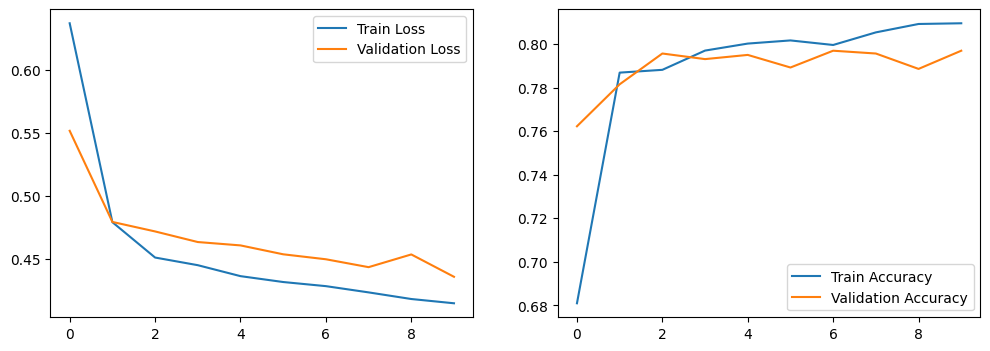

In [52]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# SOFTMAX

In [ ]:
model = Sequential()
model.add(Dense(30,  activation="relu", input_shape = X_train.shape[1:]))
model.add(Dense(20, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="softmax"))

In [59]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

In [60]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
195/195 [==============================] - 1s 3ms/step - loss: 0.5994 - accuracy: 0.4957 - precision_5: 0.4957 - recall_5: 1.0000 - val_loss: 0.5325 - val_accuracy: 0.5174 - val_precision_5: 0.5174 - val_recall_5: 1.0000
Epoch 2/10
195/195 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.4957 - precision_5: 0.4957 - recall_5: 1.0000 - val_loss: 0.4817 - val_accuracy: 0.5174 - val_precision_5: 0.5174 - val_recall_5: 1.0000
Epoch 3/10
195/195 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.4957 - precision_5: 0.4957 - recall_5: 1.0000 - val_loss: 0.4701 - val_accuracy: 0.5174 - val_precision_5: 0.5174 - val_recall_5: 1.0000
Epoch 4/10
195/195 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.4957 - precision_5: 0.4957 - recall_5: 1.0000 - val_loss: 0.4597 - val_accuracy: 0.5174 - val_precision_5: 0.5174 - val_recall_5: 1.0000
Epoch 5/10
195/195 [==============================] - 0s 3ms/step - loss

In [61]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}")

61/61 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.4997 - precision_5: 0.4997 - recall_5: 1.0000
Test Accuracy: 0.50, Precision: 0.50, Recall: 1.00


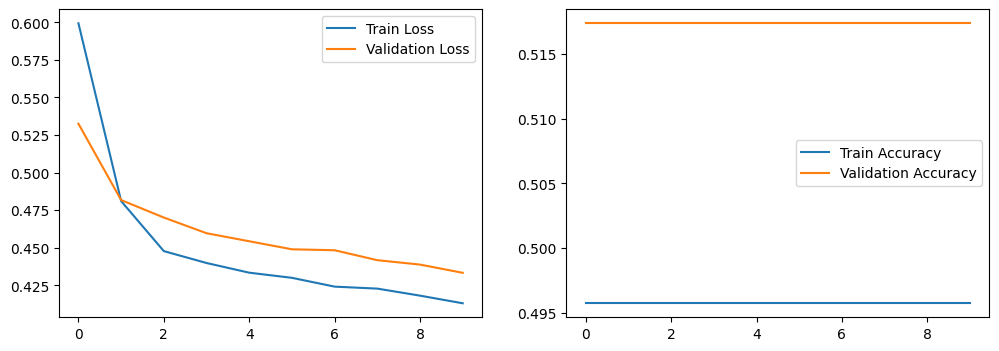

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()